In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 

In [6]:
dfs = []
# for each json file in logs folder
files = sorted(glob.glob('logs/*.json'))
for filename in files:
    # read the json file
    df = pd.read_json(filename)
    # parse filename to extract parameters
    params = filename.split('/')[-1].replace('.json', '').split('_')
    parsed_params = {param.split('=')[0]: param.split('=')[1] for param in params if '=' in param}
    
    # add parameters to the dataframe
    df['data'] = parsed_params['musdb']
    df['epochs'] = parsed_params['epochs']
    df['loss'] = list(parsed_params.keys())[-2]
    df['filename'] = filename
    print(parsed_params)
    
    dfs.append(df)
    
dfs[0]

{'musdb': 'noaug2spk', 'wav': 'noaug', 'epochs': '31', 'repeat': '1', 'size': '128', 'SISDR': 'True', 'aug': 'True'}
{'musdb': 'noaug', 'wav': 'noaug', 'epochs': '150', 'repeat': '1', 'size': '128', 'SISDR': 'True', 'repitch': '0.0'}
{'musdb': 'noaug3spk', 'wav': 'noaug', 'epochs': '30', 'repeat': '1', 'size': '128', 'SISDR': 'True', 'augment': 'True'}
{'musdb': 'no', 'wav': 'no', 'epochs': '30', 'repeat': '1', 'size': '16', 'poiSISDR': 'True', 'repitch': '0.0'}
{'musdb': 'noaug4spk', 'wav': 'noaug', 'epochs': '29', 'repeat': '1', 'size': '128', 'SISDR': 'True', 'aug': 'True'}
{'musdb': 'no', 'wav': 'no', 'channels': '1', 'epochs': '30', 'repeat': '1', 'size': '16', 'SISDR': 'True', 'repitch': '0.0'}
{'musdb': 'mads', 'wav': 'mads', 'epochs': '30', 'repeat': '1', 'size': '128', 'SISDR': 'True', 'augment': 'True'}
{'musdb': 'noaug', 'epochs': '150', 'repeat': '1', 'size': '4', 'SISDR': 'True', 'augment': 'False'}
{'musdb': 'noaug', 'wav': 'noaug', 'epochs': '150', 'repeat': '1', 'size':

,train,valid,best,duration,model_size,true_model_size,compressed_model_size,data,epochs,loss,filename
0,-2.874110,9.128422,9.128422,164.233601,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
1,-6.886636,9.072837,9.072837,140.969414,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
2,-8.366096,9.070636,9.070636,141.573744,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
3,-8.775651,9.068969,9.068969,145.165544,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
4,-9.130747,9.069786,9.068969,143.223717,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
5,-9.259347,9.069257,9.068969,142.746912,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
6,-9.352078,9.068415,9.068415,145.550435,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
7,-9.656918,9.068667,9.068415,144.193391,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
8,-9.871103,9.067921,9.067921,141.698359,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...
9,-10.091177,9.066361,9.066361,145.051323,0,0,0,noaug2spk,31,SISDR,logs/2speakers_musdb=noaug2spk_wav=noaug_epoch...


In [ ]:
def plot_trainig(df):
    # plot loss train valid vs index 
    plt.figure(figsize=(10, 5))
    plt.plot(df['train'], label='Train Loss')
    plt.plot(df['valid'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{df["data"].iloc[0]} - {df["loss"].iloc[0]}')
    plt.suptitle(f'{df["filename"]}')
    plt.legend()
    plt.grid()
    plt.xlim(0, int(df['epochs'].iloc[0]))
    plt.show()

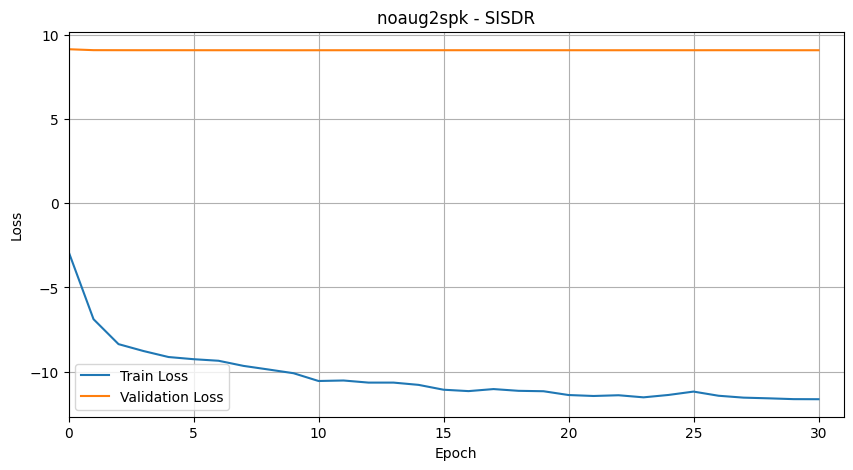

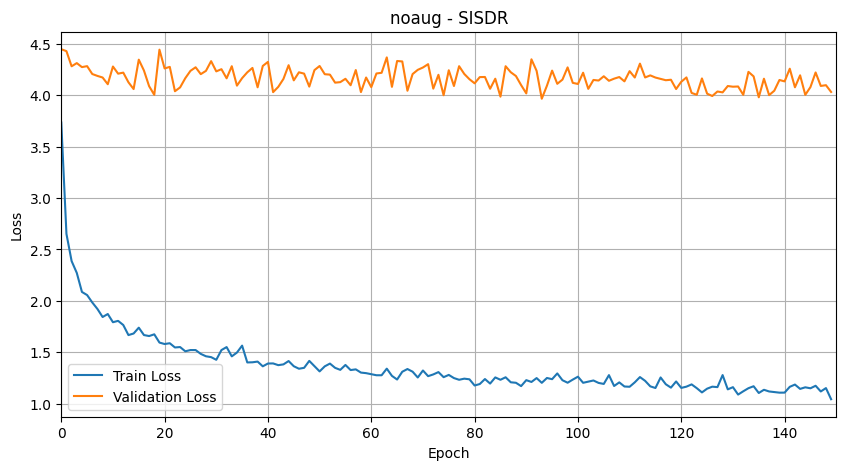

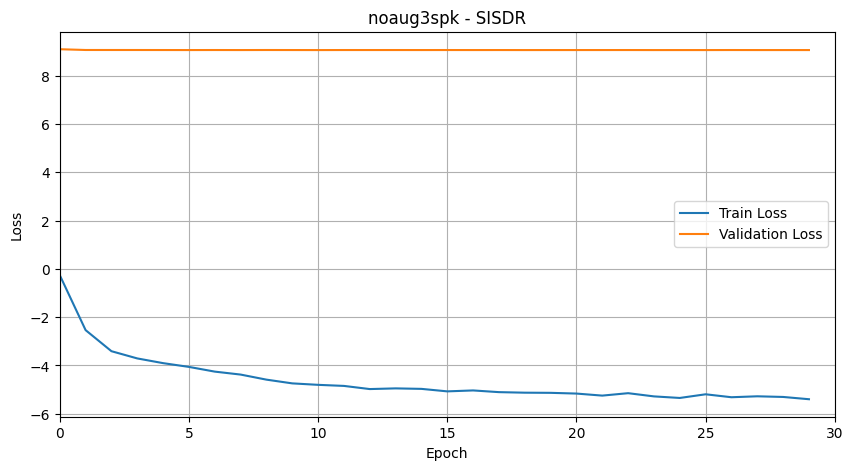

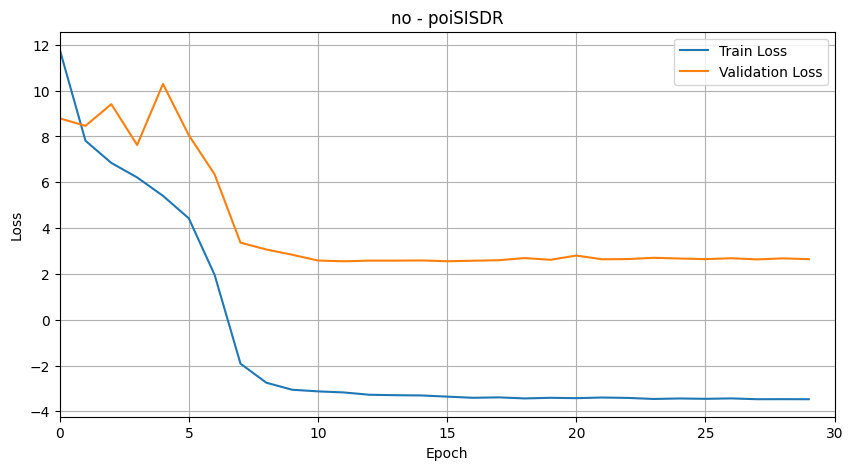

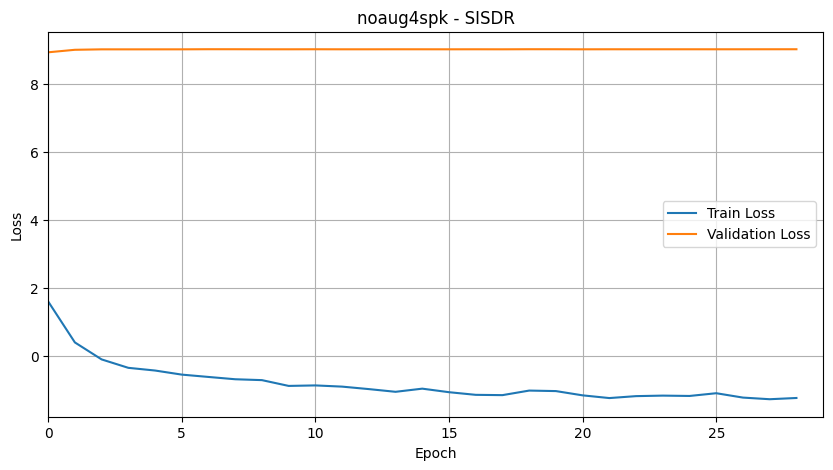

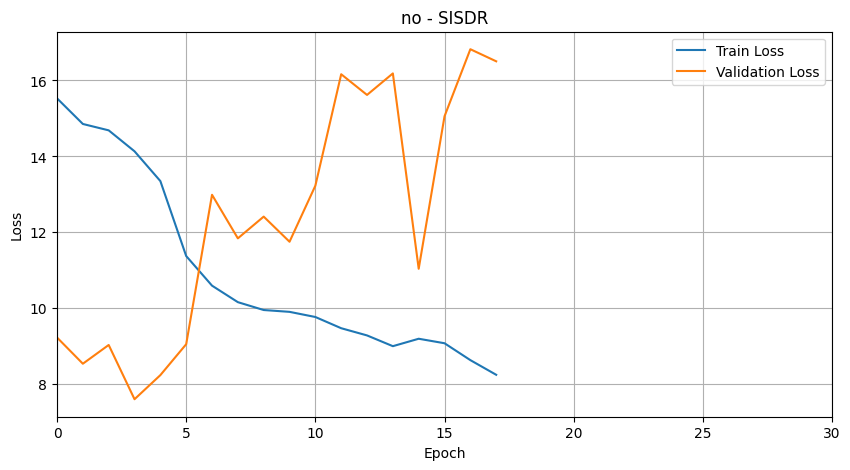

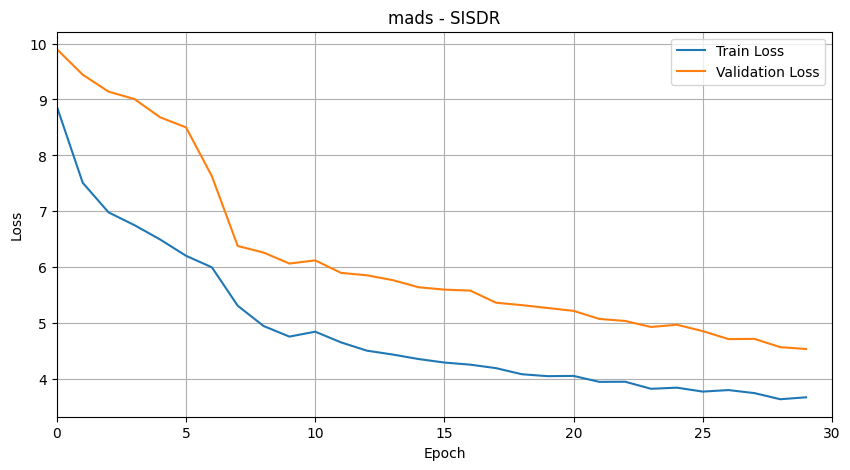

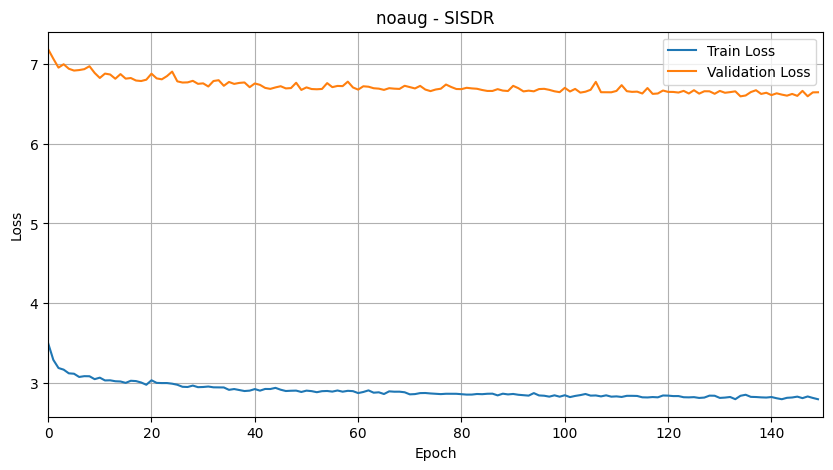

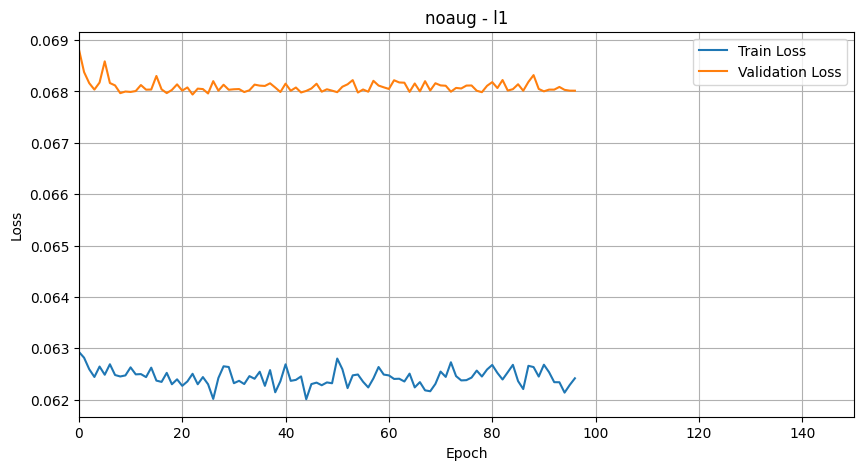

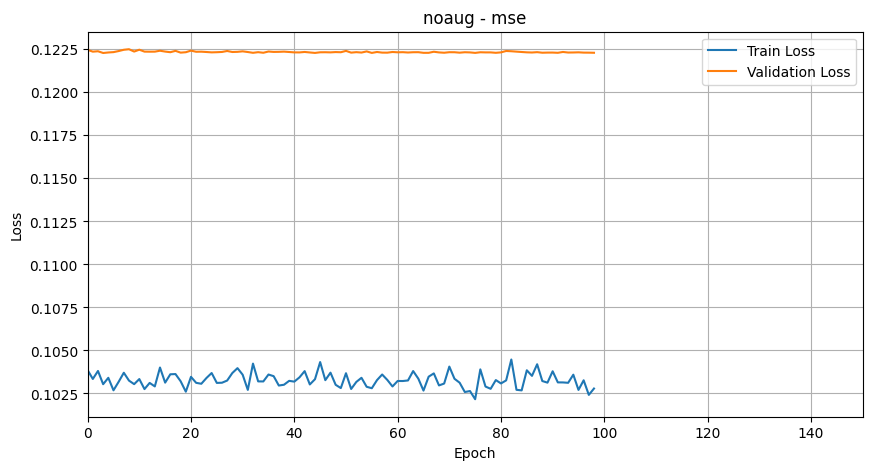

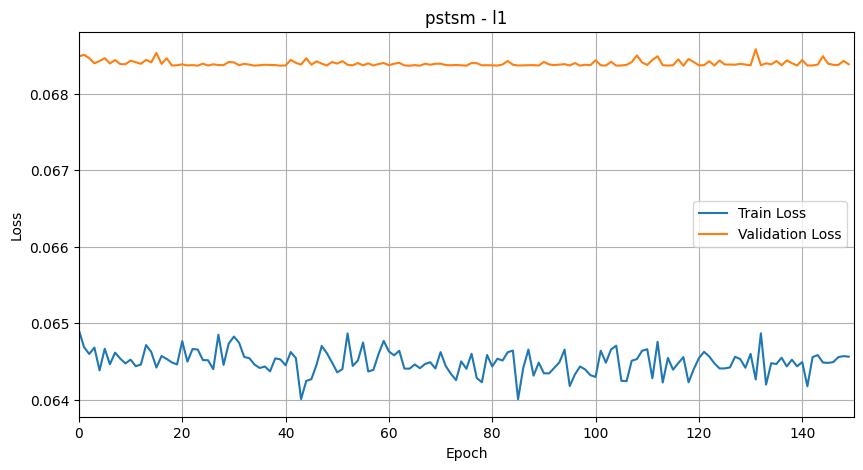

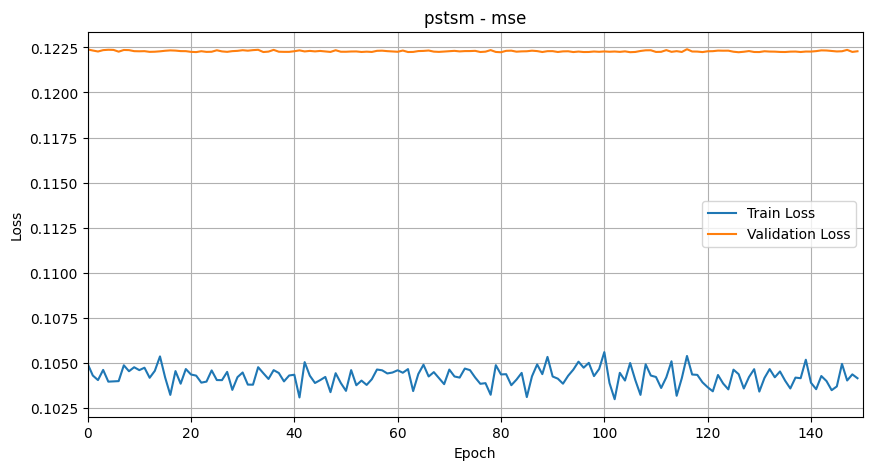

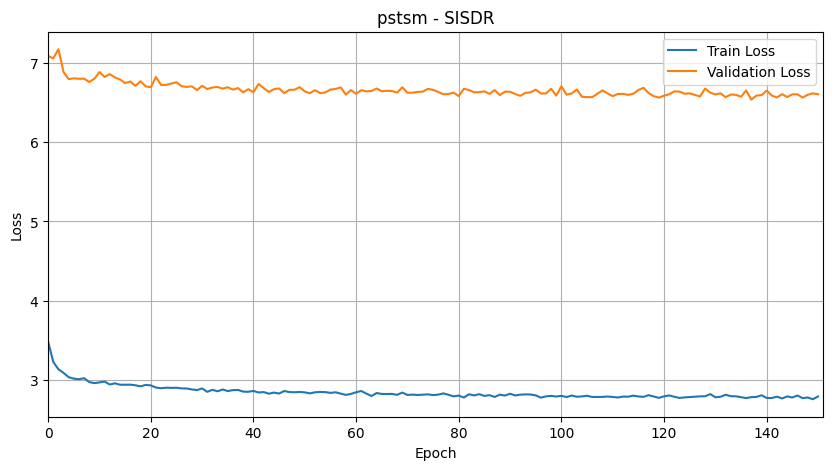

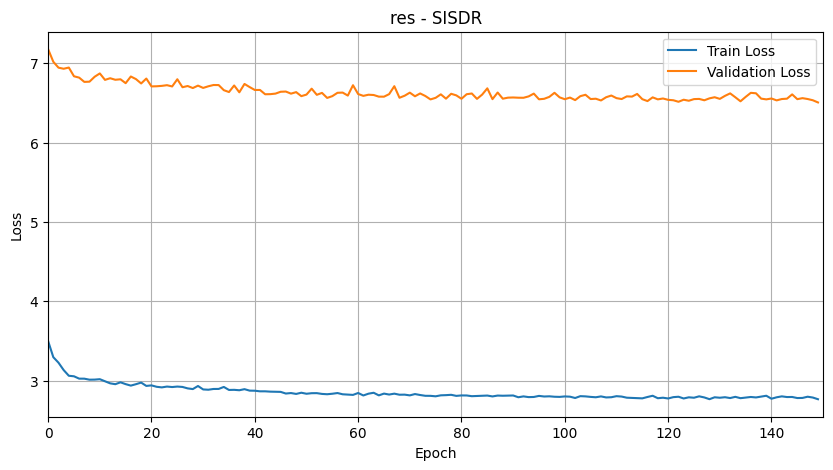

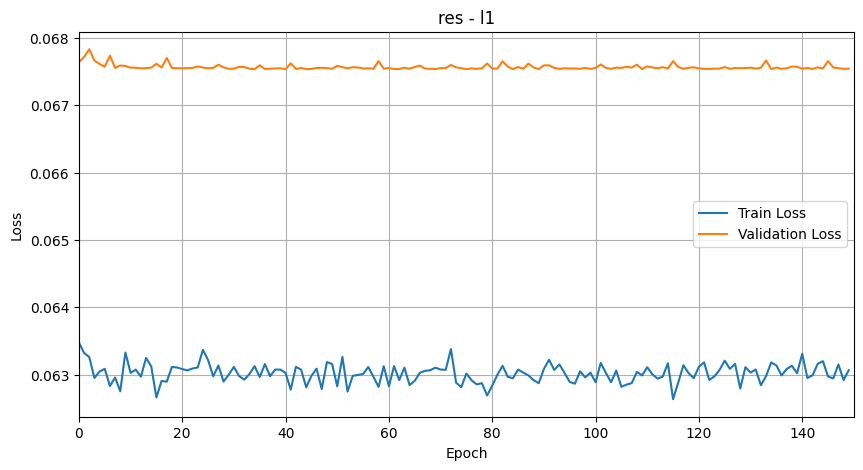

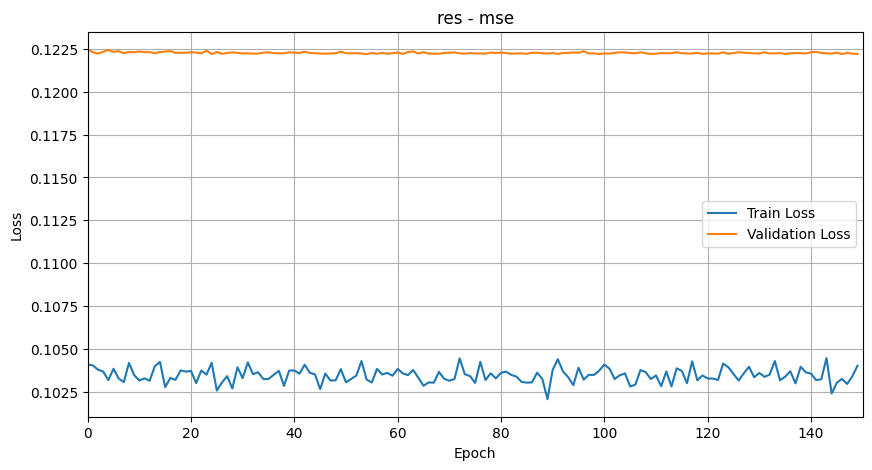

In [8]:
for df in dfs:
    plot_trainig(df)